<a href="https://colab.research.google.com/github/Mhoover41/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Project_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction of Product Sales- Revisited**


- **Author:** Melissa Hoover

### Data Dictionary

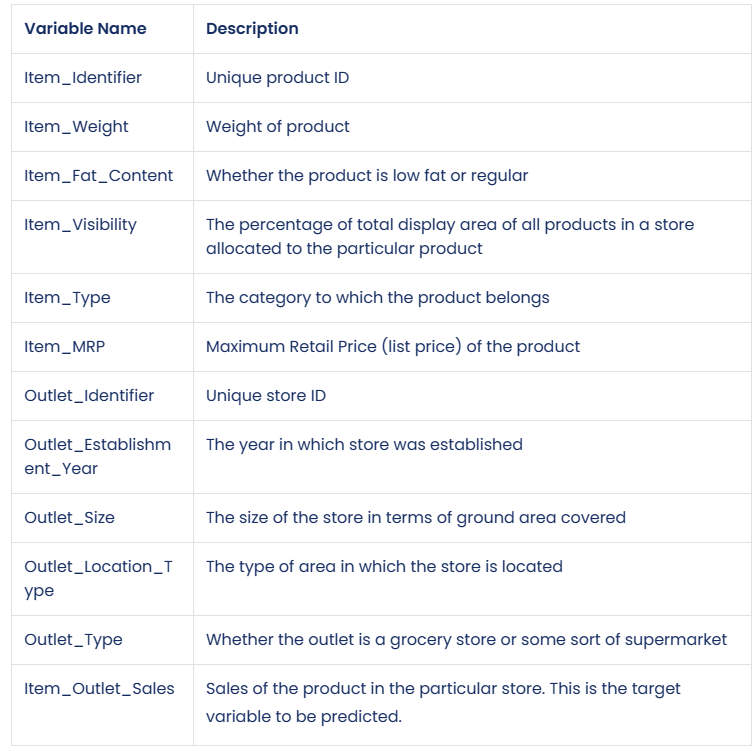

### **Import Libraries**

In [1]:
#Standard Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## Diagram
from sklearn import set_config
set_config(display='diagram')

## set pandas to display more columns
pd.set_option('display.max_columns',50)

## set to display up to 2 decimal places
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)


### **Load Data**

In [2]:
#Load the data file
df= pd.read_csv('Data/sales_predictions.csv')

### **Inspect Data**

In [3]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


  How many Rows/Columns:

In [4]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


  - There are 8523 rows and 12 columns

### **Display Column Names, Count of Non-Null Values, and Data Types**

In [5]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Clean Data**

   

Checking the data types:

In [6]:
# Display data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

### Checking for duplicate data:


In [7]:
# Display duplicate values
duplicated_values = df.duplicated().sum()

print(f"Total number of duplicated values is {duplicated_values}")

Total number of duplicated values is 0


### Identifying missing values:

In [8]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 3873


In [9]:
# Display the count of missing values for each column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

Item_Identifier              0.00
Item_Weight                 17.17
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                 28.28
Outlet_Location_Type         0.00
Outlet_Type                  0.00
Item_Outlet_Sales            0.00
dtype: float64

- I will impute these in the preprocessing stage.

## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [11]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [12]:
## Display the index of object datatypes
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




### 'Item Fat Content' Column

Fixing Inconsistencies in values in Fat Content column:
  - Updated LF to Low Fat
  - Updated low fat to Low Fat
  - Updated reg to Regular

In [14]:
## Display the unique values from the column
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [15]:
#Display Item Fat Content value counts to look for any inconsistencies
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [17]:
#Check value counts again to view the changes made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [18]:
## Display the descriptive statistics for the numeric columns
df.describe(include= 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"7,060.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
std,4.64,0.05,62.28,8.37,"1,706.50"
min,4.55,0.00,31.29,"1,985.00",33.29
25%,8.77,0.03,93.83,"1,987.00",834.25
50%,12.60,0.05,143.01,"1,999.00","1,794.33"
75%,16.85,0.09,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.96"


- No odd or inconsistent values noted.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### #Define features (X) and target (y)

- Target: Item Outlet Sales
- Features: the rest of the columns except Item Identifier

In [20]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

- I dropped Item Identifier as it is not relevant

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.22,Regular,0.06,Baking Goods,61.25,OUT010,1998,NaN,Tier 3,Grocery Store
7604,6.13,Low Fat,0.08,Soft Drinks,111.29,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,12.15,Low Fat,0.03,Household,151.07,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,5.95,Low Fat,0.09,Household,127.87,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,18.20,Regular,0.07,Fruits and Vegetables,247.21,OUT035,2004,Small,Tier 2,Supermarket Type1


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


# Preprocessing + Column Transformer

### Identify each feature as ordinal, numerical, nominal, or pass through


- ordinal features = none
- numeric features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
- nominal features = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']







In [23]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [24]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [25]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002E047534AF0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002E047534310>)],
                  verbose_feature_names_out=False)

## Project 1 Revisited
- Remake X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.


### Fit on Training data and get column names

In [26]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
      

**Create a preprocessed DataFrame for our training & Test set**

In [27]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.22,0.06,61.25,"1,998.00",0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
7604,6.13,0.08,111.29,"2,009.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2762,12.15,0.03,151.07,"2,004.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [28]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,15.25,0.06,132.30,"2,007.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
2391,17.85,0.04,127.10,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
163,7.27,0.07,114.25,"1,997.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


In [29]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

8077   1,696.46
2391   2,024.03
163    2,618.59
Name: Item_Outlet_Sales, dtype: float64

### Custom Functions

In [30]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

### Feature Importance

In [31]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

### Get Coefficients

In [32]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

### Functionizing Coefficient Visualization

In [33]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

### Plot Importance

In [34]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [35]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

## Linear Regression Model

### Fit & Evaluate Model

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1114.98
Test Data:	R^2= 0.56	RMSE= 1164.41


In [37]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Type_Grocery Store           -884.69
Outlet_Identifier_OUT019            -464.15
Outlet_Identifier_OUT010            -420.54
Item_Visibility                     -276.61
Outlet_Location_Type_Tier 1         -250.10
Outlet_Size_MISSING                 -247.19
Item_Type_Soft Drinks               -117.86
Outlet_Size_Small                    -96.07
Outlet_Identifier_OUT049             -87.19
Outlet_Type_Supermarket Type2        -87.01
Outlet_Identifier_OUT018             -87.01
Item_Type_Household                  -68.64
Outlet_Identifier_OUT013             -67.99
Outlet_Size_High                     -67.99
Item_Type_Dairy                      -48.84
Item_Type_Health and Hygiene         -41.50
Outlet_Identifier_OUT045             -39.83
Item_Type_Meat                       -15.91
Item_Fat_Content_Low Fat             -15.69
Outlet_Establishment_Year            -14.22
Item_Type_Snack Foods                -11.70
Item_Type_Frozen Foods                -5.41
Item_Type_Breads                

### Visualizing the Coefficients

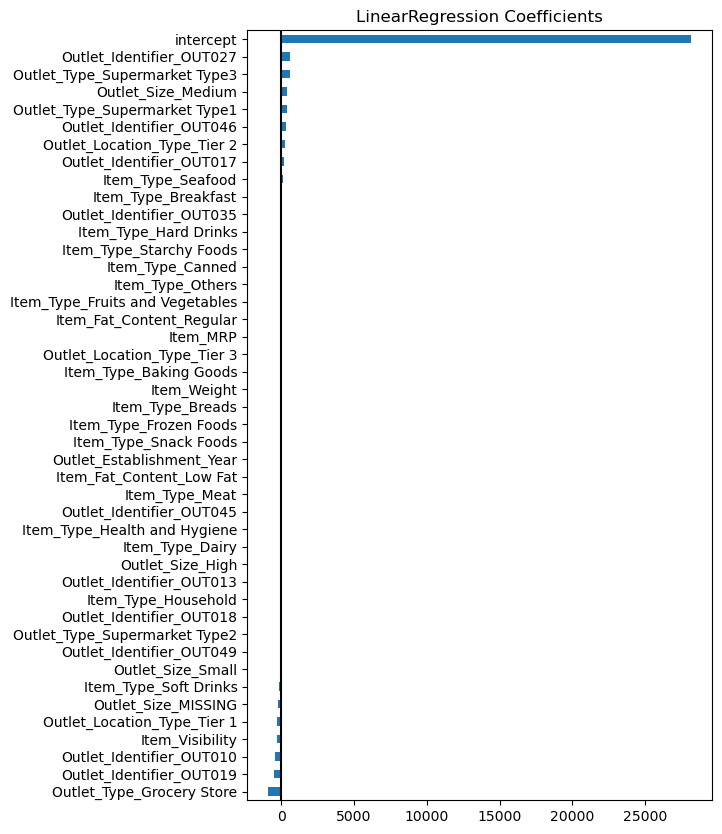

In [38]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

<AxesSubplot: title={'center': 'Top 10 Largest Coefficients'}, xlabel='Coefficient', ylabel='Feature Names'>

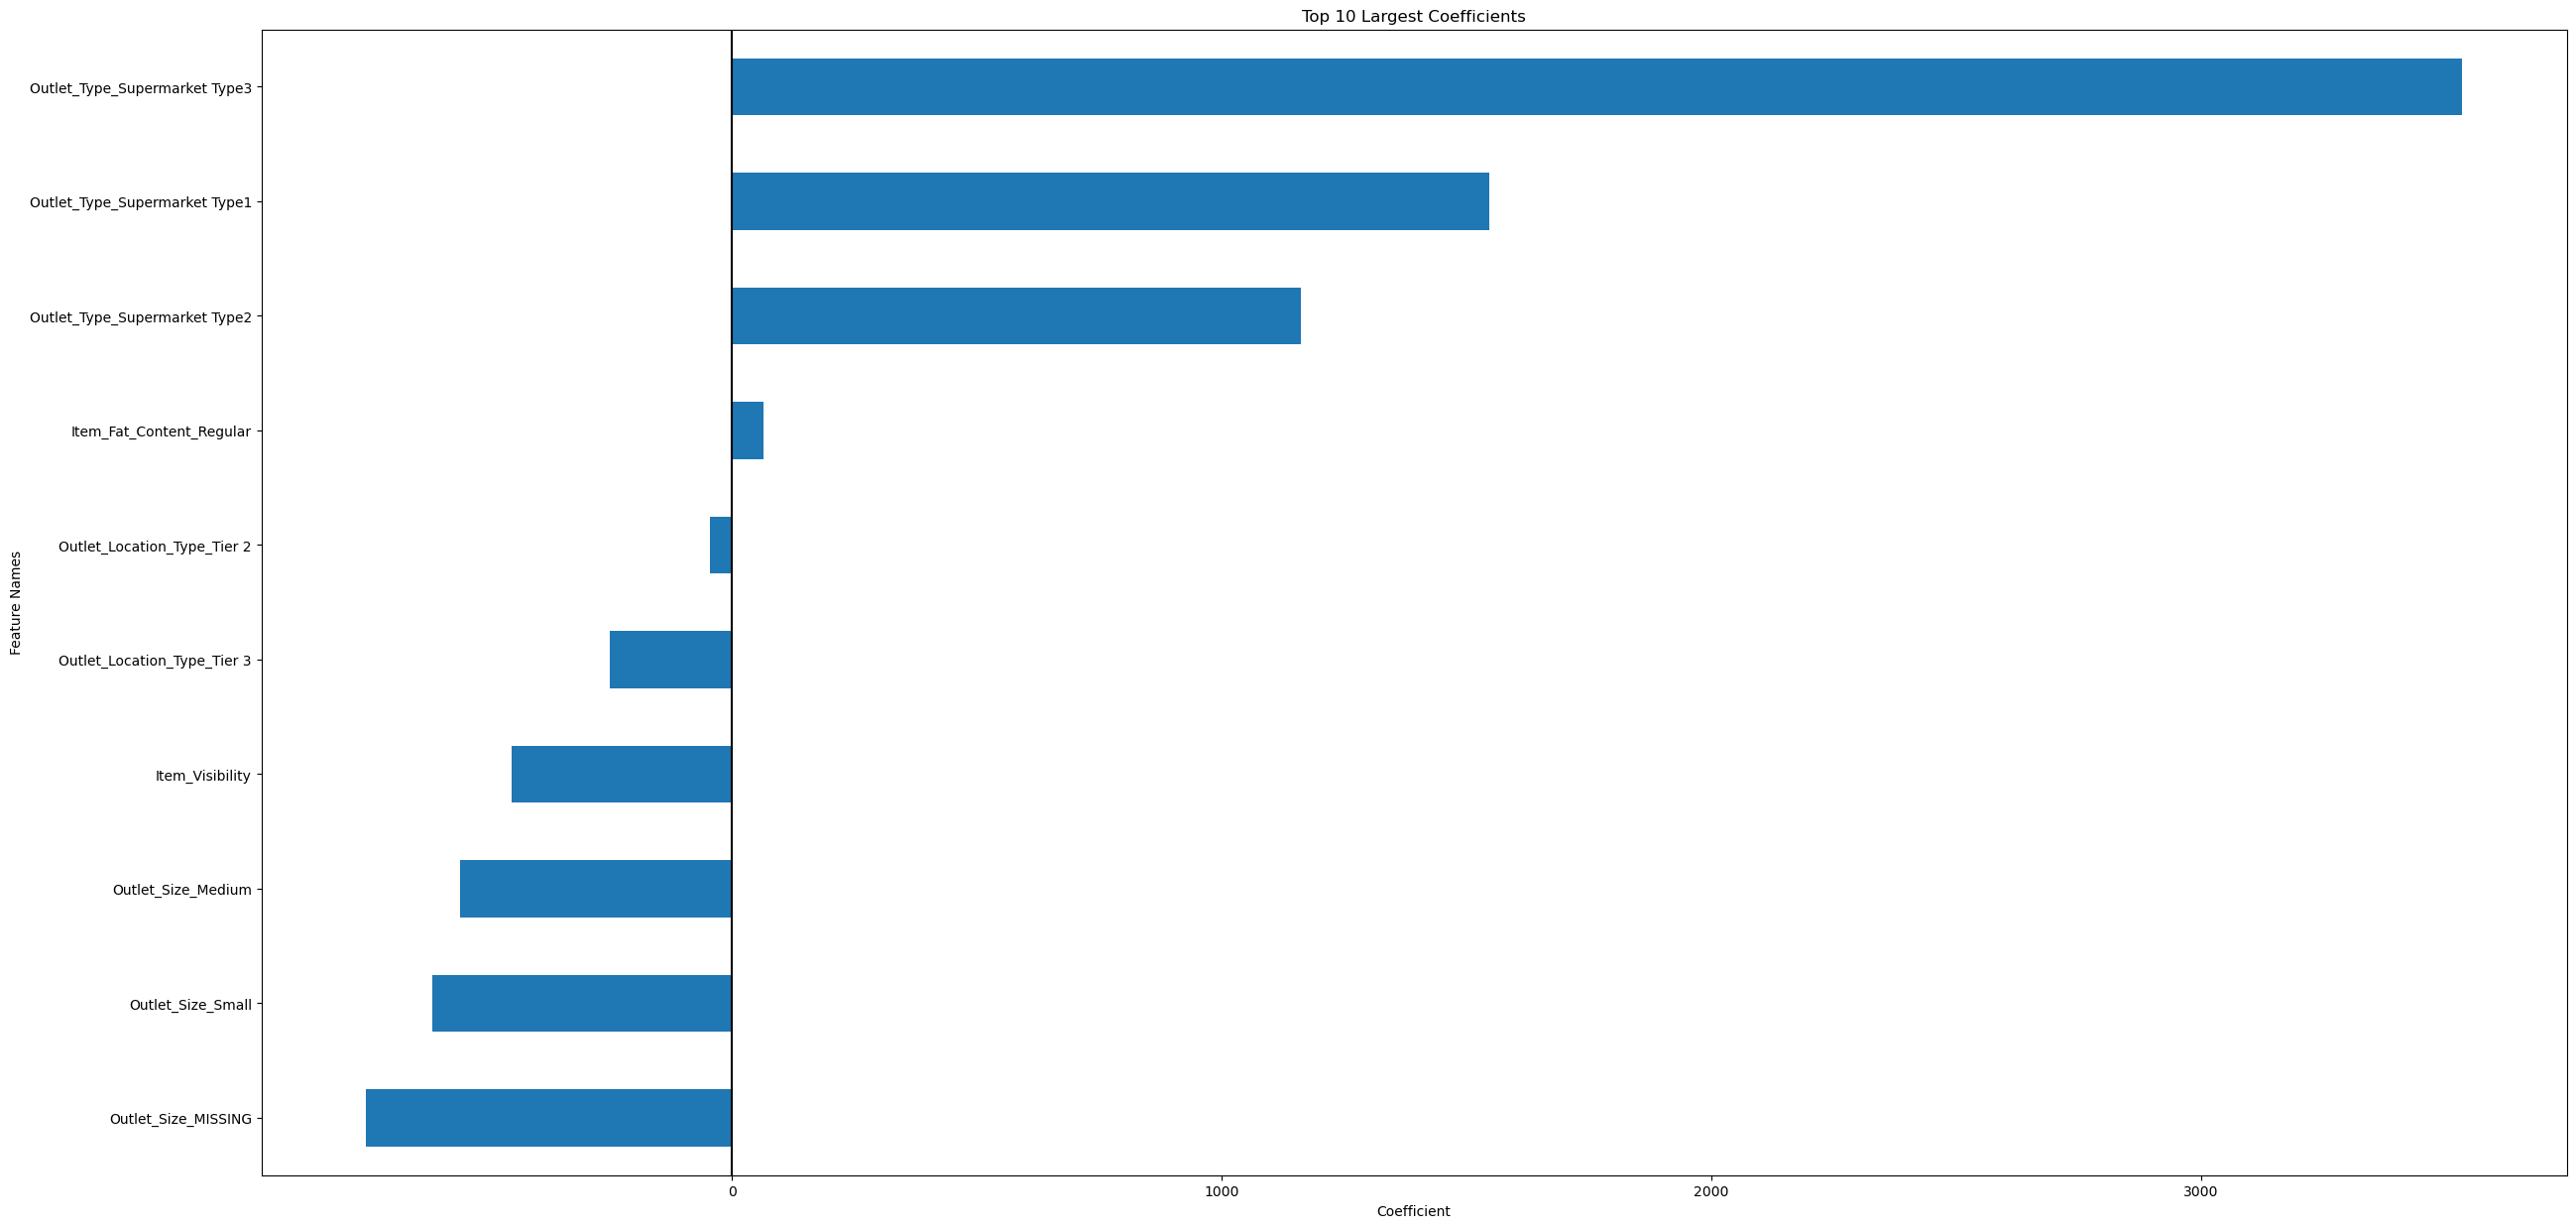

In [59]:
plot_coeffs(coeffs, top_n=10,  figsize=(30,15), intercept=False)

### Rank Coefficients

In [40]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                         44.00
Outlet_Type_Grocery Store         43.00
Outlet_Identifier_OUT027          42.00
Outlet_Type_Supermarket Type3     41.00
Outlet_Identifier_OUT019          40.00
Outlet_Identifier_OUT010          39.00
Outlet_Size_Medium                38.00
Outlet_Type_Supermarket Type1     37.00
Outlet_Identifier_OUT046          36.00
Item_Visibility                   35.00
Outlet_Location_Type_Tier 1       34.00
Outlet_Size_MISSING               33.00
Outlet_Location_Type_Tier 2       32.00
Outlet_Identifier_OUT017          31.00
Item_Type_Soft Drinks             30.00
Item_Type_Seafood                 29.00
Outlet_Size_Small                 28.00
Outlet_Identifier_OUT049          27.00
Outlet_Type_Supermarket Type2     26.00
Outlet_Identifier_OUT018          25.00
Item_Type_Breakfast               24.00
Item_Type_Household               23.00
Outlet_Identifier_OUT013          22.00
Outlet_Size_High                  21.00
Outlet_Identifier_OUT035          20.00


In [41]:
top_n_features = coeff_rank.head(4)
top_n_features

intercept                       44.00
Outlet_Type_Grocery Store       43.00
Outlet_Identifier_OUT027        42.00
Outlet_Type_Supermarket Type3   41.00
dtype: float64

In [42]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept                       28,131.99
Outlet_Type_Grocery Store         -884.69
Outlet_Identifier_OUT027           585.45
Outlet_Type_Supermarket Type3      585.45
dtype: float64

In [43]:
top_n = 3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Grocery Store     -884.69
Outlet_Identifier_OUT027       585.45
intercept                   28,131.99
dtype: float64

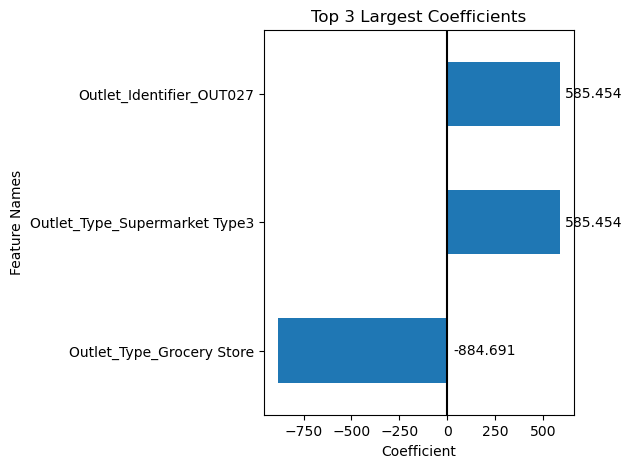

In [44]:
ax = plot_coeffs(coeffs,top_n=3)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height() / 2
    ## get the value to annotate
    val = bar.get_width()
    
    if val < 0:
        val_pos = 0
    else:
        val_pos = val
    
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left', va='center',size=10,
                xytext=(4,0), textcoords='offset points')

In [45]:
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [46]:
df2 = df.copy()

In [47]:
#Defining my Target variable which is y and the remaining features X
X = df2.drop(columns = ['Item_Identifier','Item_Type', 'Outlet_Identifier','Item_Outlet_Sales'])
y = df2['Item_Outlet_Sales']

In [48]:
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.35,Low Fat,0.03,256.46,2009,Medium,Tier 3,Supermarket Type2
7510,15.25,Regular,0.00,179.77,2009,Medium,Tier 3,Supermarket Type2
5828,12.35,Regular,0.16,157.29,1999,Medium,Tier 1,Supermarket Type1
5327,7.97,Low Fat,0.01,82.33,2004,Small,Tier 2,Supermarket Type1
4810,19.35,Low Fat,0.02,120.91,2002,NaN,Tier 2,Supermarket Type1


In [49]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='first', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
## make the preprocessing column transformer

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002E047534AF0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002E047534310>)],
                  verbose_feature_names_out=False)

In [50]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.30,0.03,79.43,"1,987.00",0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
2957,7.93,0.07,42.71,"1,997.00",0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
7031,14.50,0.04,42.05,"1,999.00",1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


In [51]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1140.10
Test Data:	R^2= 0.57	RMSE= 1089.53


In [52]:
# Tip: sklearn models now store the feature names in .feature_names_in_!
lin_reg.feature_names_in_

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Outlet_Size_MISSING', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [53]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
coeffs['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                          -2.04
Item_Visibility                    -448.85
Item_MRP                             15.70
Outlet_Establishment_Year            27.54
Item_Fat_Content_Regular             64.12
Outlet_Size_MISSING                -746.74
Outlet_Size_Medium                 -554.53
Outlet_Size_Small                  -611.39
Outlet_Location_Type_Tier 2         -45.70
Outlet_Location_Type_Tier 3        -248.81
Outlet_Type_Supermarket Type1     1,547.30
Outlet_Type_Supermarket Type2     1,161.92
Outlet_Type_Supermarket Type3     3,532.29
intercept                       -55,869.81
dtype: float64

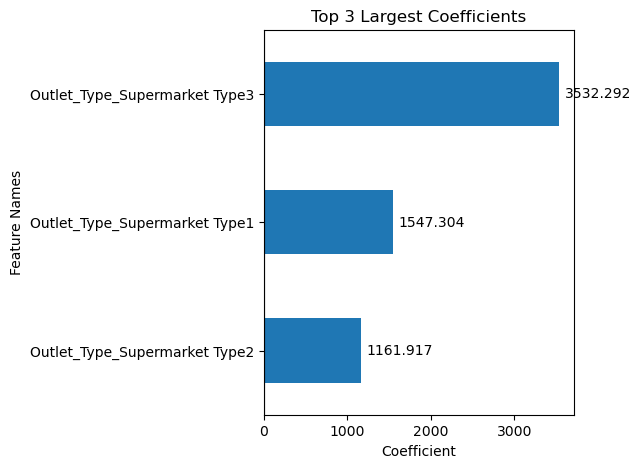

In [54]:
ax = plot_coeffs(coeffs,top_n=3)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height() / 2
    ## get the value to annotate
    val = bar.get_width()
    
    if val < 0:
        val_pos = 0
    else:
        val_pos = val
    
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left', va='center',size=10,
                xytext=(4,0), textcoords='offset points')

### Interpreting Our Model's Coefficients
- Intercept:
    - Our model assumed a baseline Item Outlet Sales of $2345.75

- Outlet_Type_Supermarket Type 3:
    - Increases Item Outlet Sales by $1971.39

- Item_MRP:
    - Increases Item Outlet Sales by $983.10
    
- Outlet_Type_Grocery Store: 
    - Decreases Item Outlet Sales by $1560.38

## Random Forest Model

Training Data:	R^2= 0.94	RMSE= 432.37
Test Data:	R^2= 0.55	RMSE= 1111.62


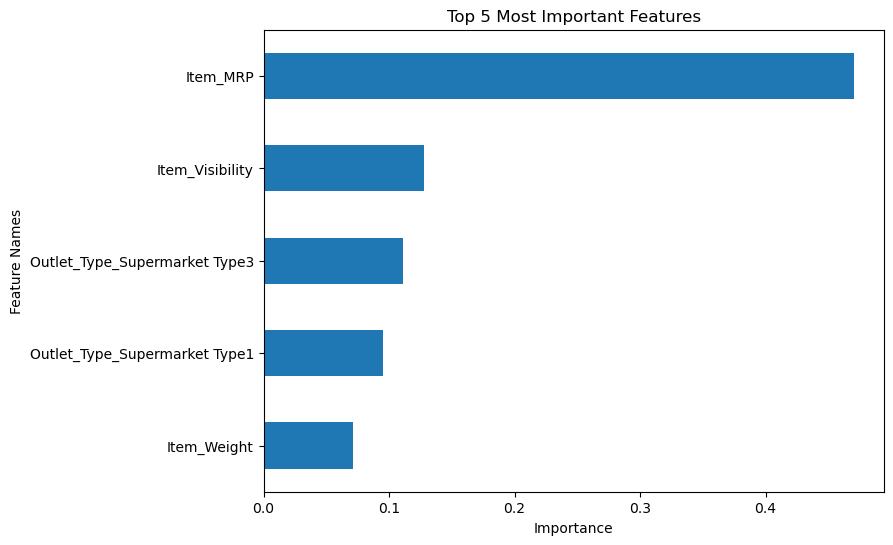

In [71]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=5);

In [72]:
reg.feature_importances_

array([0.0714247 , 0.12781115, 0.470572  , 0.05007653, 0.01282097,
       0.00486881, 0.02329502, 0.00735038, 0.00349681, 0.00373692,
       0.09475678, 0.0183489 , 0.11144103])

In [73]:
# Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

13
13


True

In [57]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')

## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Outlet_Location_Type_Tier 2     0.00
Outlet_Location_Type_Tier 3     0.00
Outlet_Size_MISSING             0.00
Outlet_Size_Small               0.01
Item_Fat_Content_Regular        0.01
Outlet_Type_Supermarket Type2   0.02
Outlet_Size_Medium              0.02
Outlet_Establishment_Year       0.05
Item_Weight                     0.07
Outlet_Type_Supermarket Type1   0.09
Outlet_Type_Supermarket Type3   0.11
Item_Visibility                 0.13
Item_MRP                        0.47
Name: Feature Importance, dtype: float64

### Exploring the Most Important Features

In [74]:
importances.sort_values(ascending=False).head(5)

Item_MRP                        0.47
Item_Visibility                 0.13
Outlet_Type_Supermarket Type3   0.11
Outlet_Type_Supermarket Type1   0.09
Item_Weight                     0.07
Name: Feature Importance, dtype: float64

In [63]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
4776,16.35,0.03,256.46,"2,009.00",0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,515.33
7510,15.25,0.00,179.77,"2,009.00",1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,"3,056.02"
5828,12.35,0.16,157.29,"1,999.00",1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,"1,577.95"
5327,7.97,0.01,82.33,"2,004.00",0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,"1,331.60"
4810,19.35,0.02,120.91,"2,002.00",0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"1,687.14"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,17.60,0.01,171.64,"1,987.00",0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,"3,793.73"
4836,10.20,0.00,143.12,"2,007.00",0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"2,410.86"
8064,8.10,0.13,210.49,"2,002.00",0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,"5,309.76"
4418,6.59,0.03,119.01,"1,999.00",0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,"2,530.71"


<AxesSubplot: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

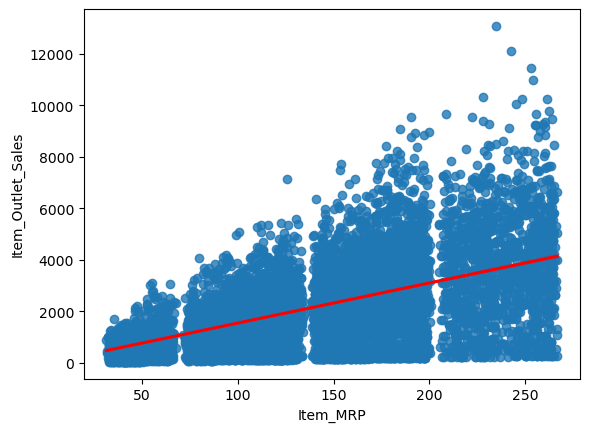

In [65]:
sns.regplot(data=plot_df, x='Item_MRP',y='Item_Outlet_Sales', line_kws={'color': 'red'})

<AxesSubplot: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

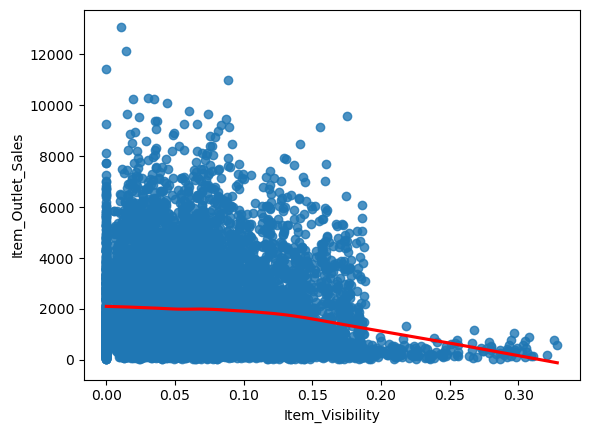

In [68]:
sns.regplot(data=plot_df, x='Item_Visibility',y='Item_Outlet_Sales', lowess=True, line_kws={'color': 'red'})


<AxesSubplot: xlabel='Outlet_Type_Supermarket Type3', ylabel='Item_Outlet_Sales'>

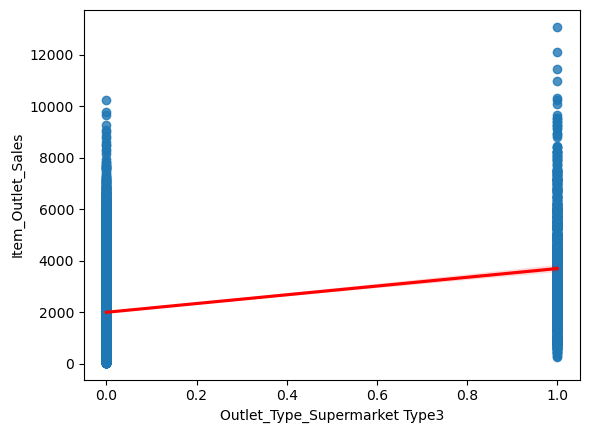

In [70]:
sns.regplot(data=plot_df, x='Outlet_Type_Supermarket Type3',y='Item_Outlet_Sales', line_kws={'color': 'red'})

<AxesSubplot: xlabel='Outlet_Type_Supermarket Type1', ylabel='Item_Outlet_Sales'>

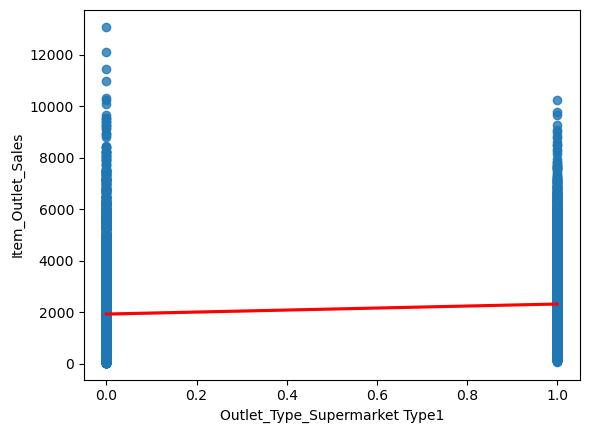

In [75]:
sns.regplot(data=plot_df, x='Outlet_Type_Supermarket Type1',y='Item_Outlet_Sales', line_kws={'color': 'red'})

<AxesSubplot: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

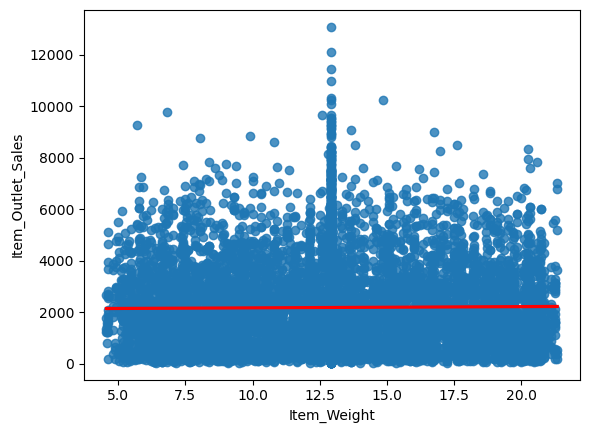

In [76]:
sns.regplot(data=plot_df, x='Item_Weight',y='Item_Outlet_Sales', line_kws={'color': 'red'})